In [1]:
#Librerias
import pandas as pd
import requests
from bs4 import BeautifulSoup
from io import BytesIO
from PIL import Image
import numpy as np
import pytesseract
import tensorflow as tf
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.preprocessing import image as img_preprocess
from tensorflow.keras.layers import Input, GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model
import cv2
import os
import re

In [14]:
# Reemplaza 'ruta_del_archivo.xlsx' con la ruta al archivo de Excel que deseas leer
ruta_del_archivo = 'Admetricks del 25 al 31.xlsx'

# Cargar el archivo de Excel en un DataFrame de pandas
df = pd.read_excel(ruta_del_archivo)

# Mostrar las primeras filas del DataFrame para verificar que se ha cargado correctamente
df

,Label,Fecha,industria,marca,Anunciante,Producto,Gatillador,Oferta,Nombre de campaña,Landing page de la campaña,...,Country,Device,Hospedado por,Vendido por,Impacto,Impresiones,Valorización (Local),Valorización (Dólares),Ads Count,Reporte web
0,1,2024-01-03,telecomunicaciones e internet - empresas de te...,claro,Not classified,MOVIL,EQUIPO,Equipos - Honor 90,#Honor 90 primero en Claro,tiendaclaro.pe/honor-90-512gb-verde-esmeralda-...,...,peru,desktop,fbcdn.net,direct,100112,1571082,3244.2592,883.2790,1,https://one.admetricks.com/#/campaign?name=%23...
1,2,2024-03-15,telecomunicaciones e internet - empresas de te...,movistar,Not classified,HOGAR,VELOCIDAD,Fibra Óptica - Plan 300 MB x S/69- 1000 MB x 6...,#OfertaFibra,tiendaonline.movistar.com.pe/promociones/mp-pa...,...,peru,mobile,unknown,google,38,186,3.6483,0.9933,2,https://one.admetricks.com/#/campaign?name=%23...
2,3,2024-03-15,telecomunicaciones e internet - empresas de te...,movistar,Not classified,HOGAR,VELOCIDAD,Fibra Óptica - Plan 300 MB x S/69- 1000 MB x 6...,#OfertaFibra,tiendaonline.movistar.com.pe/promociones/mp-pa...,...,peru,mobile,unknown,google,194,388,5.2611,1.4324,1,https://one.admetricks.com/#/campaign?name=%23...
3,4,2024-03-15,telecomunicaciones e internet - empresas de te...,movistar,Not classified,HOGAR,VELOCIDAD,Fibra Óptica - Plan 300 MB x S/69- 1000 MB x 6...,#OfertaFibra,tiendaonline.movistar.com.pe/promociones/mp-pa...,...,peru,mobile,unknown,google,34,138,1.2849,0.3498,2,https://one.admetricks.com/#/campaign?name=%23...
4,5,2024-03-15,telecomunicaciones e internet - empresas de te...,movistar,Not classified,HOGAR,VELOCIDAD,Fibra Óptica - Plan 300 MB x S/69- 1000 MB x 6...,#OfertaFibra,tiendaonline.movistar.com.pe/promociones/mp-pa...,...,peru,mobile,unknown,google,118,600,19.5673,5.3274,1,https://one.admetricks.com/#/campaign?name=%23...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34314,34315,2024-03-23,telecomunicaciones e internet - empresas de te...,claro,Not classified,MOVIL,EQUIPO,Equipos - Cyber Claro,ZTE Blade V50 Design - Características y Preci...,tiendaclaro.pe/zte-blade-v50-design-256gb-verd...,...,peru,desktop,fbcdn.net,direct,12460,246995,505.9580,137.7517,1,https://one.admetricks.com/#/campaign?name=ZTE...
34315,34316,2024-03-24,telecomunicaciones e internet - empresas de te...,claro,Not classified,MOVIL,EQUIPO,Equipos - Cyber Claro,ZTE Blade V50 Design - Características y Preci...,tiendaclaro.pe/zte-blade-v50-design-256gb-verd...,...,peru,desktop,fbcdn.net,direct,43686,865977,1788.6598,486.9789,3,https://one.admetricks.com/#/campaign?name=ZTE...
34316,34317,2024-03-25,telecomunicaciones e internet - empresas de te...,claro,Not classified,MOVIL,EQUIPO,Equipos - Cyber Claro,ZTE Blade V50 Design - Características y Preci...,tiendaclaro.pe/zte-blade-v50-design-256gb-verd...,...,peru,desktop,fbcdn.net,direct,14302,333402,704.9996,189.8211,1,https://one.admetricks.com/#/campaign?name=ZTE...
34317,34318,2024-03-17,telecomunicaciones e internet - empresas de te...,claro,Not classified,MOVIL,EQUIPO,Equipos - Cyber Claro,ZTE Blade V50 Vita - Características y precio ...,tiendaclaro.pe/zte-blade-v50-vita-256gb-negro-...,...,peru,desktop,fbcdn.net,direct,10796,214014,438.4681,119.3769,1,https://one.admetricks.com/#/campaign?name=ZTE...


In [15]:
# Obtener la cantidad de datos en el DataFrame
cantidad_datos = len(df)

# Mostrar la cantidad de datos
print("La cantidad de datos en el DataFrame es:", cantidad_datos)

La cantidad de datos en el DataFrame es: 34319


In [16]:
# Eliminar datos duplicados de la columna 'Advertisement'
df.drop_duplicates(subset=['Advertisement'], inplace=True)

In [17]:
# Obtener la cantidad de datos en el DataFrame
cantidad_datos = len(df)

# Mostrar la cantidad de datos
print("La cantidad de datos en el DataFrame es:", cantidad_datos)

La cantidad de datos en el DataFrame es: 9978


In [18]:
# Contar la cantidad de enlaces que terminan en '.jpg' y '.mp4'
cantidad_jpg = df['Advertisement'].str.endswith('.jpg').sum()
cantidad_mp4 = df['Advertisement'].str.endswith('.mp4').sum()

print("Cantidad de enlaces que terminan en '.jpg':", cantidad_jpg)
print("Cantidad de enlaces que terminan en '.mp4':", cantidad_mp4)

Cantidad de enlaces que terminan en '.jpg': 9820
Cantidad de enlaces que terminan en '.mp4': 152


In [19]:
# Función para filtrar los enlaces que terminan en '.jpg'
def filter_jpg_links(url):
    pattern = r'\.jpg$'
    if re.search(pattern, url):
        return True
    else:
        return False

# Filtrar la columna 'Advertisement' para seleccionar solo los enlaces que terminan en '.jpg'
df = df[df['Advertisement'].apply(filter_jpg_links)]

In [20]:
# Contar la cantidad de enlaces que terminan en '.jpg' y '.mp4'
cantidad_jpg = df['Advertisement'].str.endswith('.jpg').sum()
cantidad_mp4 = df['Advertisement'].str.endswith('.mp4').sum()

print("Cantidad de enlaces que terminan en '.jpg':", cantidad_jpg)
print("Cantidad de enlaces que terminan en '.mp4':", cantidad_mp4)

Cantidad de enlaces que terminan en '.jpg': 9820
Cantidad de enlaces que terminan en '.mp4': 0


In [21]:
import pandas as pd
import numpy as np
import requests
from PIL import Image
from io import BytesIO
import tensorflow as tf
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.preprocessing import image as img_preprocess
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
import pytesseract

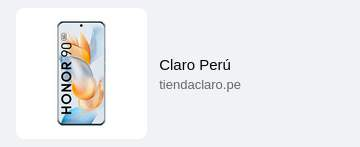

In [22]:
# Función para descargar y abrir una imagen desde una URL
def open_image_from_url(url):
    response = requests.get(url)
    if response.status_code == 200:
        img = Image.open(BytesIO(response.content))
        return img
    else:
        print(f"Error al descargar la imagen desde {url}")
        return None

# Obtener la URL de la primera imagen en la columna 'Advertisement'
url_imagen = df['Advertisement'].iloc[0]

# Descargar y abrir la imagen
imagen = open_image_from_url(url_imagen)

# Mostrar la imagen
if imagen:
    imagen.show()

imagen

In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Supongamos que tu DataFrame df tiene muchas columnas, incluyendo 'label' y 'Advertisement'
# Aquí filtramos solo las columnas necesarias
df_filtered = df[['Label', 'Advertisement']]

# Dividir el DataFrame en conjuntos de entrenamiento y validación
train_df, val_df = train_test_split(df_filtered, test_size=0.2, random_state=42)

# Mostrar los DataFrames resultantes
print("Entrenamiento:", train_df.head())
print("Validación:", val_df.head())


Entrenamiento:        Label                                      Advertisement
1869    1870  https://ads.admetricks.com/banner_119c823c91b9...
11547  11548  https://ads.admetricks.com/banner_2028509f7dae...
100      101  https://ads.admetricks.com/banner_89ff649abead...
23450  23451  https://ads.admetricks.com/banner_826e3257af30...
207      208  https://ads.admetricks.com/banner_13cfc4efbe8e...
Validación:        Label                                      Advertisement
27058  27059  https://ads.admetricks.com/banner_f2aa2a537aa5...
22860  22861  https://ads.admetricks.com/banner_39dfef29a850...
1810    1811  https://ads.admetricks.com/banner_45a3543088bf...
33927  33928  https://ads.admetricks.com/banner_d8b79d9b6bff...
1451    1452  https://ads.admetricks.com/banner_120eb427dad5...


In [26]:
# Función para crear un dataset de TensorFlow a partir de un DataFrame
def create_dataset(df):
    image_paths = df['Advertisement'].values
    labels = df['Label'].values  # Obtener las etiquetas del DataFrame

    def gen():
        for img_path, label in zip(image_paths, labels):
            yield download_and_process_image(img_path), label

    dataset = tf.data.Dataset.from_generator(gen, (tf.float32, tf.int32), (tf.TensorShape([224, 224, 3]), tf.TensorShape([])))
    return dataset

# Crear datasets de entrenamiento y validación
train_ds = create_dataset(train_df)
val_ds = create_dataset(val_df)

# Configurar los datasets para que sean más eficientes
train_ds = train_ds.batch(32).prefetch(tf.data.experimental.AUTOTUNE)
val_ds = val_ds.batch(32).prefetch(tf.data.experimental.AUTOTUNE)


Instructions for updating:
Use output_signature instead
Instructions for updating:
Use output_signature instead


In [ ]:


# Función para leer una imagen desde una URL
def read_image_from_url(url):
    try:
        response = requests.get(url)
        response.raise_for_status()  # Verificar si hubo algún error en la descarga
        image = Image.open(BytesIO(response.content))
        return image
    except (requests.RequestException, IOError) as e:
        print(f"Error al descargar o abrir la imagen desde {url}: {e}")
        return None

# Función para procesar la imagen y extraer características
def process_image(img):
    try:
        img = img.resize((224, 224))
        x = img_preprocess.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = tf.keras.applications.efficientnet.preprocess_input(x)

        base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
        features = base_model.predict(x)
        pooled_features = np.mean(features, axis=(1, 2))  # Global average pooling

        return pooled_features
    except Exception as e:
        print(f"Error al procesar la imagen: {e}")
        return None

# Función para extraer texto de una imagen utilizando pytesseract
def extract_text(img):
    try:
        text = pytesseract.image_to_string(img)
        return text
    except Exception as e:
        print(f"Error al extraer texto de la imagen: {e}")
        return ""

# Cargar el archivo de Excel en un DataFrame de pandas
ruta_del_archivo = 'Admetricks del 25 al 31.xlsx'
df = pd.read_excel(ruta_del_archivo)

# Eliminar datos duplicados de la columna 'Advertisement'
df.drop_duplicates(subset=['Advertisement'], inplace=True)

# Crear una nueva columna para almacenar las características extraídas
df['Caracteristicas'] = df['Advertisement'].apply(lambda url: process_image(read_image_from_url(url)) if url.endswith('.jpg') or url.endswith('.mp4') else None)

# Crear una nueva columna para almacenar el texto extraído de las imágenes
df['Texto_extraido'] = df['Advertisement'].apply(lambda url: extract_text(read_image_from_url(url)) if url.endswith('.jpg') or url.endswith('.mp4') else "")

# Mostrar las primeras filas del DataFrame con las características extraídas y el texto extraído
print(df.head())

# Guardar el DataFrame con las columnas de características y texto extraído en un nuevo archivo Excel
#df.to_excel('Admetricks_con_caracteristicas_y_texto.xlsx', index=False)


In [ ]:
# Función para leer una imagen desde una URL
def read_image_from_url(url):
    response = requests.get(url)
    image = Image.open(BytesIO(response.content))
    return image

In [ ]:
# Función para procesar la imagen y extraer características
def process_image(img):
    img = img.resize((224, 224))
    x = img_preprocess.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = tf.keras.applications.efficientnet.preprocess_input(x)

    base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
    features = base_model.predict(x)
    pooled_features = np.mean(features, axis=(1, 2))  # Global average pooling

    return pooled_features

In [ ]:
# Cargar el archivo de Excel en un DataFrame de pandas
ruta_del_archivo = 'Admetricks del 25 al 31.xlsx'
df = pd.read_excel(ruta_del_archivo)

# Aplicar la función process_image a la columna 'Advertisement' para extraer características
df['Caracteristicas'] = df['Advertisement'].apply(lambda url: process_image(read_image_from_url(url)))

# Ahora puedes utilizar las características extraídas para entrenar un modelo de clasificación de texto
# por ejemplo, un modelo de clasificación binaria para predecir si una imagen contiene cierto texto o no.
# Este modelo dependerá de tus datos y de la tarea específica que quieras realizar.

# Muestra las primeras filas del DataFrame con las características extraídas
print(df.head())

In [ ]:
# Extraer texto de la imagen
def extract_text(img):
    text = pytesseract.image_to_string(img)
    return text

In [ ]:

# Iterar sobre las filas del DataFrame
for index, row in df.iterrows():
    # Obtener la URL de la imagen de la fila actual
    url_imagen = row['Advertisement']

    # Descargar la imagen
    imagen = download_image(url_imagen)

    # Procesar la imagen y extraer características
    modelo_imagen = process_image(imagen)

    # Extraer texto de la imagen
    texto_imagen = extract_text(imagen)

    # Asignar el texto extraído a una nueva columna en el DataFrame
    df.at[index, 'Texto_extraido'] = texto_imagen

# Guardar el DataFrame con la columna de texto extraído en un nuevo archivo Excel
df.to_excel('Admetricks_con_texto_extraido.xlsx', index=False)